In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

print('The size of dataset: ', df.size)
print(df.columns)
print('\nInformation\n')
print(df.describe(include='all'))

df = df.drop(labels = 'Id', axis=1)
print('\nThe size of dataset after deleting \'Id\' column: ', df.size)

The size of dataset:  118260
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
   

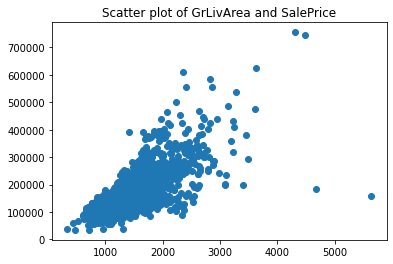


The outliers

      GrLivArea  SalePrice
58         2945     438780
118        3222     320000
178        2234     501837
185        3608     475000
197        3112     235000
304        3493     295000
349        2728     437154
389        2332     426000
440        2402     555000
473        1976     440000
496        3228     430000
523        4676     184750
527        2713     446261
591        2296     451950
608        3194     359100
635        3395     200000
664        2097     423000
691        4316     755000
769        3279     538000
798        3140     485000
803        2822     582933
898        2364     611657
1046       2868     556581
1142       2828     424870
1169       3627     625000
1182       4476     745000
1243       2076     465000
1268       3447     381000
1298       5642     160000
1353       3238     410000
1373       2633     466500


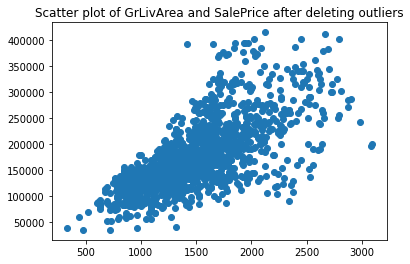

In [2]:
import matplotlib.pyplot as plt

# Plot
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('Scatter plot of GrLivArea and SalePrice')
plt.show()
# Find outliers
col = df[['GrLivArea', 'SalePrice']]
Z_score = (col - col.mean()) / col.std()
outliers = col.loc[((Z_score >= -3).sum(axis=1) != 2) | ((Z_score <= 3).sum(axis=1) != 2),:]
print('\nThe outliers\n')
print(outliers)

# Delete outliers and plot
df.drop(outliers.index[:], inplace=True)
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('Scatter plot of GrLivArea and SalePrice after deleting outliers')
plt.show()

In [3]:
# The corralatioin
print('The Correlation\n')
print(df.corr())

The Correlation

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.417629 -0.144201     0.042016    -0.066636   
LotFrontage     -0.417629     1.000000  0.390849     0.205920    -0.050658   
LotArea         -0.144201     0.390849  1.000000     0.066725    -0.001396   
OverallQual      0.042016     0.205920  0.066725     1.000000    -0.089164   
OverallCond     -0.066636    -0.050658 -0.001396    -0.089164     1.000000   
YearBuilt        0.039706     0.116949  0.002335     0.582341    -0.363998   
YearRemodAdd     0.043687     0.070129 -0.003659     0.544543     0.079260   
MasVnrArea       0.033088     0.156160  0.054669     0.364401    -0.128263   
BsmtFinSF1      -0.064623     0.121371  0.160734     0.177100    -0.023699   
BsmtFinSF2      -0.064914     0.053615  0.118049    -0.057431     0.042763   
BsmtUnfSF       -0.146069     0.142253 -0.005487     0.308319    -0.146861   
TotalBsmtSF     -0.257039     0.304242  0.21256

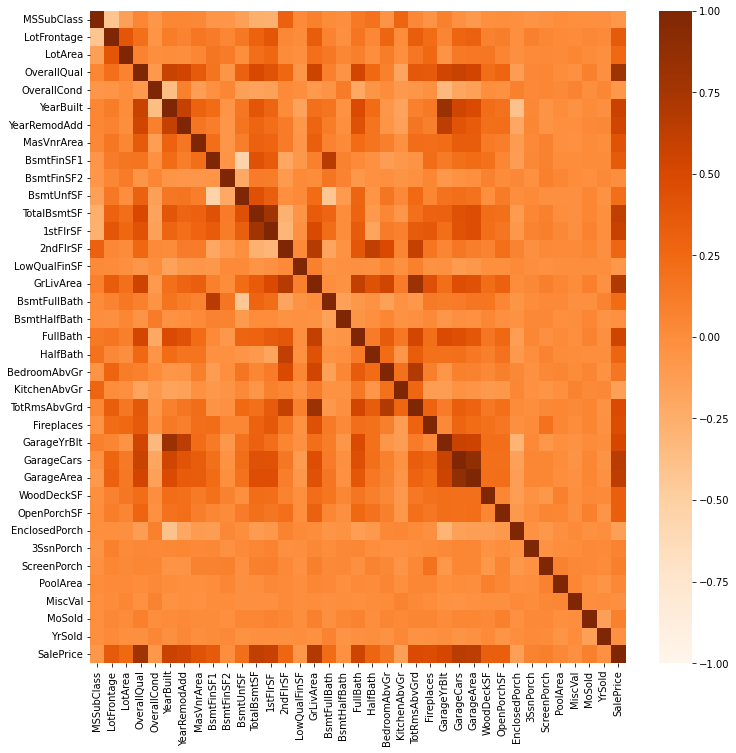

In [4]:
import seaborn as sns

# Plot the heatmap
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'Oranges')
plt.show()

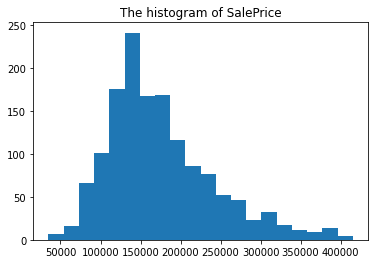

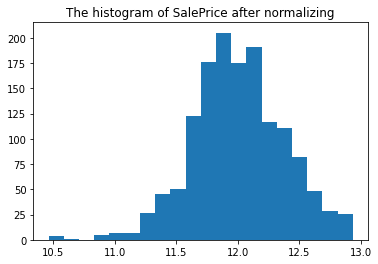

In [5]:
import numpy as np

# Plot histogram of 'SalePrice'
plt.hist(df['SalePrice'], bins = 20)
plt.title('The histogram of SalePrice')
plt.show()
# Use logarithmic processing to approximate the normal distribution and plot
plt.hist(np.log1p(df['SalePrice']), bins = 20)
plt.title('The histogram of SalePrice after normalizing')
plt.show()

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Find the missing values
print('\nMissing values in train set\n')
for col in df.columns:
    print('%s: %d' % (col,df[col].isna().sum()))
test_data = pd.read_csv('test.csv')
print('\nMissing values in test set\n')
for col in test_data.columns:
    print('%s: %d' % (col,test_data[col].isna().sum()))
# Fill missing integer and string with the median and 'None', respectively
df = df.fillna(df.median())
df = df.fillna('None')
test_data = test_data.fillna(df.median())
test_data = test_data.fillna('None')
print('\nTrain set without missing values\n')
print(df)
print('\nTest set without missing values\n')
print(test_data)


Missing values in train set

MSSubClass: 0
MSZoning: 0
LotFrontage: 256
LotArea: 0
Street: 0
Alley: 1339
LotShape: 0
LandContour: 0
Utilities: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 0
Exterior2nd: 0
MasVnrType: 7
MasVnrArea: 7
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinSF1: 0
BsmtFinType2: 38
BsmtFinSF2: 0
BsmtUnfSF: 0
TotalBsmtSF: 0
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 1
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 0
TotRmsAbvGrd: 0
Functional: 0
Fireplaces: 0
FireplaceQu: 689
GarageType: 80
GarageYrBlt: 80
GarageFinish: 80
GarageCars: 0
GarageArea: 0
GarageQual: 80
GarageCond: 80
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorc

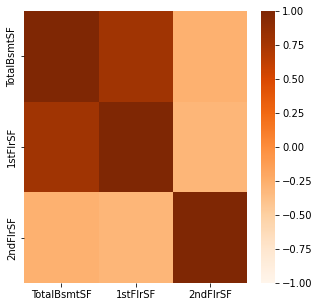

In [7]:
# Change the data type of 'MSSubClass', 'OverallCond', 'YrSold' and 'MoSold'  to string
for i in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    df[i] = pd.to_numeric(df[i])
    
# Aggregate 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'
plt.subplots(figsize=(5, 5))
agg = df.loc[:,['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']]
sns.heatmap(agg.corr(), vmin = -1, vmax = 1, cmap = 'Oranges')
plt.show()

### I found that:

TotalBsmtSF: Total square feet of basement area

1stFlrSF: square feet of 1st floor area

2ndFlrSF: square feet of 2nd floor area

As shown in the graph above, TotalBsmtSF and 1stFlrSF have a strong correlation however TotalBsmtSF and 2ndFlrSF have a very weak correlation.

As far as I know, the area of the basement and the 1st floor will be slightly smaller than the total floorspace of the house, while the area of the 2nd floor will vary greatly from house to house.

Thus, I represent the total housing area that does not appear in 'train.csv' by adding up TotalBsmtSF, 1stFlrSF and 2ndFlrSF.

In [8]:
df['TotalHousingSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
print(df['TotalHousingSF'])

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: TotalHousingSF, Length: 1429, dtype: int64
